# Preprocessing atlas: van Regteren Altena

<div class="alert alert-warning">

**What this notebook does**

In this notebook, the count table of the Human atlas of van Regteren Altena et.al. will be loaded into scanpy and be annotated for future processing, integration and downstream analysis.
</div>  



### Loading libraries
Using sc2_seurat environment, importing packages and setting parameters.

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import matplotlib.pyplot as plt
import h5py
import scipy

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

### h5 files

In [8]:
path='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/van_regteren_altena_2023/cellranger/standard_109'
g004=f'{path}/UMC-AR-g004/outs/UMC-AR-g004_cellbender_filtered.h5'
g005=f'{path}/UMC-AR-g005/outs/UMC-AR-g005_cellbender_filtered.h5'
g011=f'{path}/UMC-AR-g011/outs/UMC-AR-g011_cellbender_filtered.h5'
g012=f'{path}/UMC-AR-g012/outs/UMC-AR-g012_cellbender_filtered.h5'
g013=f'{path}/UMC-AR-g013/outs/UMC-AR-g013_cellbender_filtered.h5'
g014=f'{path}/UMC-AR-g014/outs/UMC-AR-g014_cellbender_filtered.h5'
g015=f'{path}/UMC-AR-g015/outs/UMC-AR-g015_cellbender_filtered.h5'
g016=f'{path}/UMC-AR-g016/outs/UMC-AR-g016_cellbender_filtered.h5'
g017=f'{path}/UMC-AR-g017/outs/UMC-AR-g017_cellbender_filtered.h5'
g018=f'{path}/UMC-AR-g018_fastq/outs/UMC-AR-g018_fastq_cellbender_filtered.h5'
g019=f'{path}/UMC-AR-g019_fastq/outs/UMC-AR-g019_fastq_cellbender_filtered.h5'
g020=f'{path}/UMC-AR-g020_fastq/outs/UMC-AR-g020_fastq_cellbender_filtered.h5'

g004_CR=f'{path}/UMC-AR-g004/outs/filtered_feature_bc_matrix.h5'

In [5]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/1_preprocessing')

In [6]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/1_preprocessing'

## Load data

In [9]:
files = [g004_CR]
names = ['g004'] #used for making variable names

numberobj = len(names)

object_names = list()

#locals() returns dictionary with all local variables and symbols
for i in range(numberobj):
    locals()["adata"+"_"+names[i]] = sc.read_10x_h5(files[i])
    locals()["adata"+"_"+names[i]].var_names_make_unique()
    print("adata"+"_"+names[i],"is loaded")
    
    object_names.append("adata"+"_"+names[i]) # make list of objects for later

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


adata_g004 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [10]:
for i in range(numberobj):
    print(locals()[object_names[i]].shape)

(6824, 60656)


In [6]:
files = [g004,g005,g011,g012,g013,g014,g015,g016,g017,g018,g019,g020]
names = ['g004','g005','g011','g012','g013','g014','g015','g016','g017','g018','g019','g020'] #used for making variable names

numberobj = len(names)

object_names = list()

#locals() returns dictionary with all local variables and symbols
for i in range(numberobj):
    locals()["adata"+"_"+names[i]] = sc.read_10x_h5(files[i])
    locals()["adata"+"_"+names[i]].var_names_make_unique()
    print("adata"+"_"+names[i],"is loaded")
    
    object_names.append("adata"+"_"+names[i]) # make list of objects for later

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g004 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g005 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g011 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g012 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g013 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g014 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g015 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g016 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g017 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g018 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_g019 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


adata_g020 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [7]:
old_file = '/hpc/hers_basak/rnaseq_data/Basaklab/scRNAseq_analysis/VTA_human_cellbender/data/human_merge_processed_cluster.h5ad'
old_adata = sc.read_h5ad(old_file)
print("adata"+"_old"+" is loaded")

adata_old is loaded


In [8]:
old_adata.obs[['gender','sample_name']]

gender sample_name
AATCACGCAACTGTGT-1-0  female        g004
ACTTATCTCGATACGT-1-0  female        g004
CTACATTGTTAAACCC-1-0  female        g004
TTAGGGTTCTTGCGCT-1-0  female        g004
AAGCCATGTATCGTTG-1-0  female        g004
...                      ...         ...
CTCATGCAGCAAACAT-1-8    male        g017
CAGATTGAGCCGCTTG-1-8    male        g017
ACGTACAGTAGTGTGG-1-8    male        g017
CAAGACTCAATGTCTG-1-8    male        g017
GAGGCCTTCTCTGACC-1-8    male        g017

[62021 rows x 2 columns]

## Basic Preprocessing
### Doublet detection using scrublet
Doublets are droplets that captures two cells, which will lead to inconsistencies. So we need to detect and remove them. First we will annotate the objects with metadata.

https://github.com/swolock/scrublet
https://www.sciencedirect.com/science/article/pii/S2405471218304745

Following the advice of Chromium (below). The expected cells are and expected doublet rates: \
6824 #g004 5.26% \
8804 #g005 7.54% \
9283 #g011 7.01% \
2867 #g012 2.21% \
10777 #g013 8.14% \
5992 #g014 4.59% \
6144 #g015 4.72% \
2322 #g016 1.83% \
9505 #g017 7.25% \
8835 #g018 6.77% \
9257 #g019 7.08% \
9366 #g020 7.16%
> https://uofuhealth.utah.edu/huntsman/shared-resources/gba/htg/single-cell/genomics-10x.php

\
First check the recommended threshold by scrublet (minimum mode of real and simulate data). With good bimodel distribution it should be fine otherwise set a threshold manually.


In [9]:
names

['g004',
 'g005',
 'g011',
 'g012',
 'g013',
 'g014',
 'g015',
 'g016',
 'g017',
 'g018',
 'g019',
 'g020']

In [10]:
numberobj

12

In [11]:
#manually adding metadata due to lack of metadata file
for i in range(numberobj):
    locals()[object_names[i]].obs['species'] = ['Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien'][i]
    #locals()[object_names[i]].obs['gender'] = [,'male','male'][i]
    #locals()[object_names[i]].obs['age'] = ['6 months','6 months'][i]
    locals()[object_names[i]].obs['atlas'] = ['altena','altena','altena','altena','altena','altena','altena','altena','altena','altena','altena','altena'][i]
    locals()[object_names[i]].obs['sample'] = ['g004','g005','g011','g012','g013','g014','g015','g016','g017','g018','g019','g020'][i]
    
    
#viewing object annotations
for i in range(numberobj):
    print(locals()[object_names[i]].shape)
    

thr = None
expected_doublet_rates = [0.0526, 0.0674, 0.071, 0.0221, 0.0814, 0.0459, 0.0472, 0.0183, 0.0725, 0.0677, 0.0708, 0.0716]
for i in range(numberobj):
    #predicts doublets and adds a score to objects
    sc.external.pp.scrublet(locals()[object_names[i]], expected_doublet_rate=expected_doublet_rates[i], stdev_doublet_rate=0.02, 
                            synthetic_doublet_umi_subsampling=1.0, knn_dist_metric='euclidean', normalize_variance=True, 
                            log_transform=False, mean_center=True, n_prin_comps=30, use_approx_neighbors=True, 
                            get_doublet_neighbor_parents=False, n_neighbors=None, threshold=thr, verbose=True, copy=False, random_state=0)
    #plot histogram of doublet scores(doesnt work in loop)
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),
                                               show=True,return_fig=True)


(6751, 60656)
(8723, 60656)
(9248, 60656)
(2867, 60656)
(10709, 60656)
(6713, 60656)
(7584, 60656)
(2318, 60656)
(9601, 60656)
(8818, 60656)
(9224, 60656)
(9315, 60656)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 3.7%
Estimated detectable doublet fraction = 48.0%
Overall doublet rate:
	Expected   = 5.3%
	Estimated  = 7.7%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 43.0%
Overall doublet rate:
	Expected   = 6.7%
	Estimated  = 7.3%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 4.0%
Estimated detectable doublet fraction = 42.7%
Overall doublet rate:
	Expected   = 7.1%
	Estimated  = 9.3%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.11
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 52.8%
Overall doublet rate:
	Expected   = 2.2%
	Estimated  = 7.1%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 51.9%
Overall doublet rate:
	Expected   = 8.1%
	Estimated  = 9.7%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 2.6%
Estimated detectable doublet fraction = 45.4%
Overall doublet rate:
	Expected   = 4.6%
	Estimated  = 5.8%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 2.5%
Estimated detectable doublet fraction = 33.3%
Overall doublet rate:
	Expected   = 4.7%
	Estimated  = 7.4%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 3.8%
Overall doublet rate:
	Expected   = 1.8%
	Estimated  = 14.9%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 7.6%
Estimated detectable doublet fraction = 57.1%
Overall doublet rate:
	Expected   = 7.2%
	Estimated  = 13.4%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 4.6%
Estimated detectable doublet fraction = 46.8%
Overall doublet rate:
	Expected   = 6.8%
	Estimated  = 9.8%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 12.0%
Estimated detectable doublet fraction = 64.9%
Overall doublet rate:
	Expected   = 7.1%
	Estimated  = 18.4%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.12
Detected doublet rate = 21.8%
Estimated detectable doublet fraction = 73.9%
Overall doublet rate:
	Expected   = 7.2%
	Estimated  = 29.6%


Check how many cells are higher than the threshold

In [14]:
for i in range(numberobj):
    print(names[i],'\n',locals()[object_names[i]].obs['predicted_doublet'].value_counts(),'\n')

g004 
 False    6501
True      249
Name: predicted_doublet, dtype: int64 

g005 
 False    8448
True      273
Name: predicted_doublet, dtype: int64 

g011 
 False    8879
True      368
Name: predicted_doublet, dtype: int64 

g012 
 False    2757
True      108
Name: predicted_doublet, dtype: int64 

g013 
 False    10168
True       538
Name: predicted_doublet, dtype: int64 

g014 
 False    6533
True      176
Name: predicted_doublet, dtype: int64 

g015 
 False    7392
True      186
Name: predicted_doublet, dtype: int64 

g016 
 False    2303
True       13
Name: predicted_doublet, dtype: int64 

g017 
 False    8867
True      734
Name: predicted_doublet, dtype: int64 

g018 
 False    8412
True      405
Name: predicted_doublet, dtype: int64 

g019 
 False    8119
True     1102
Name: predicted_doublet, dtype: int64 

g020 
 False    7280
True     2034
Name: predicted_doublet, dtype: int64 



### Scrublet simulation plot

g004


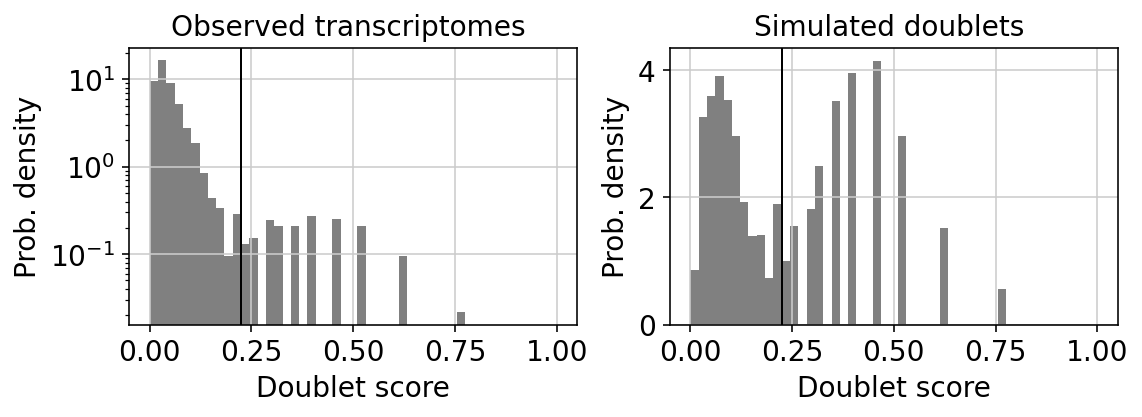

g005


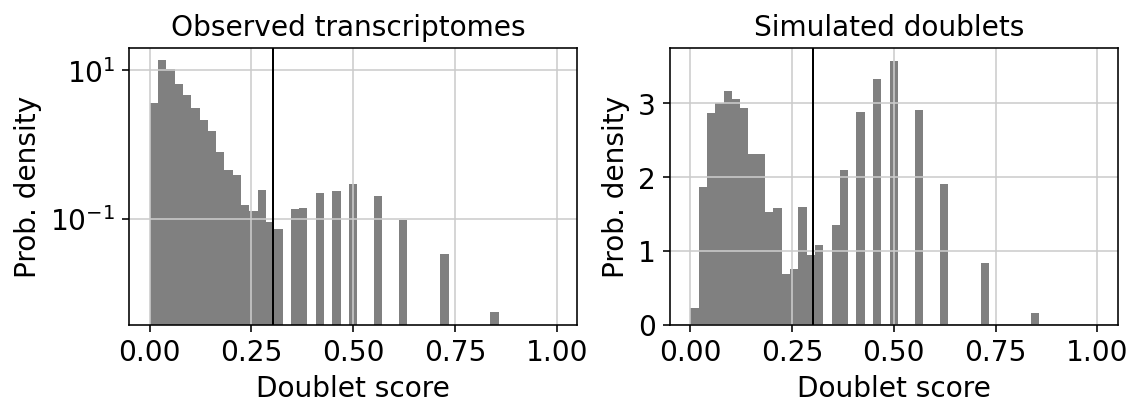

g011


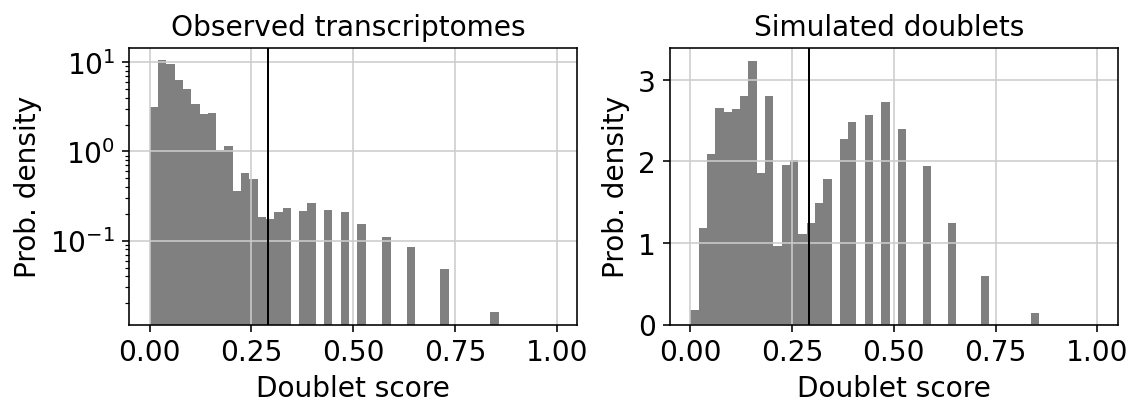

g012


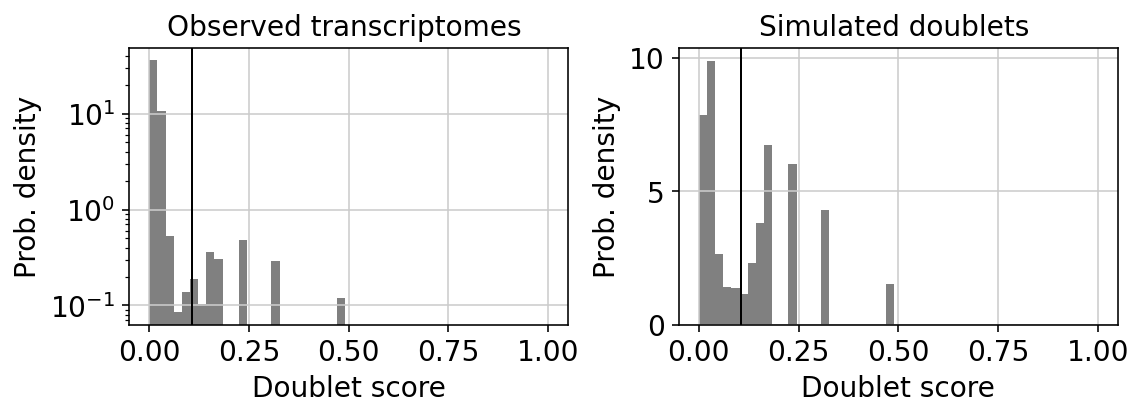

g013


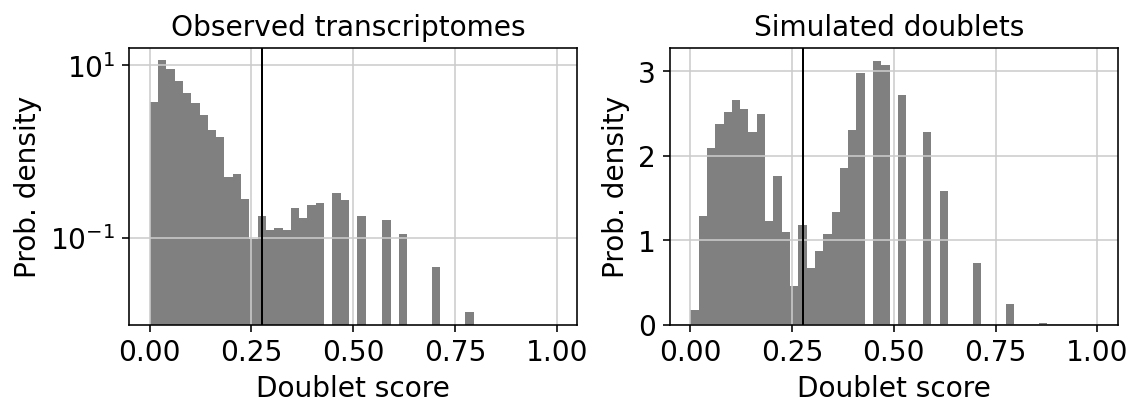

g014


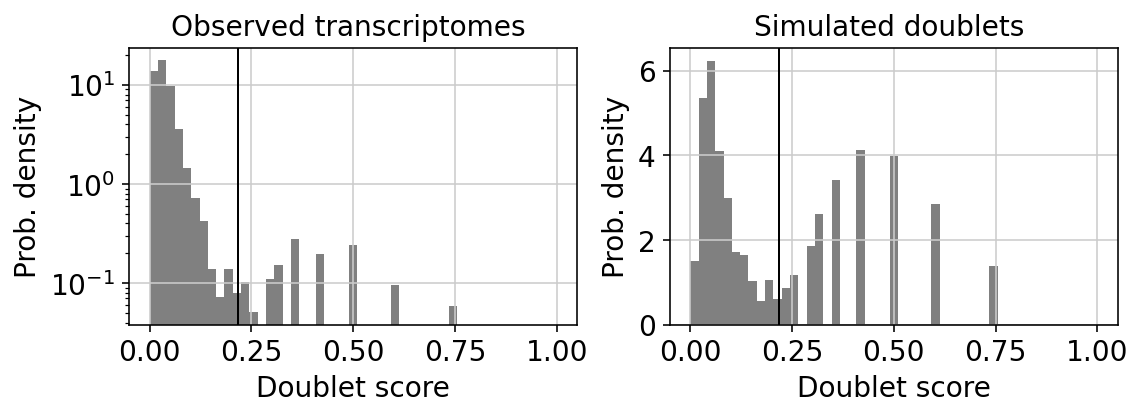

g015


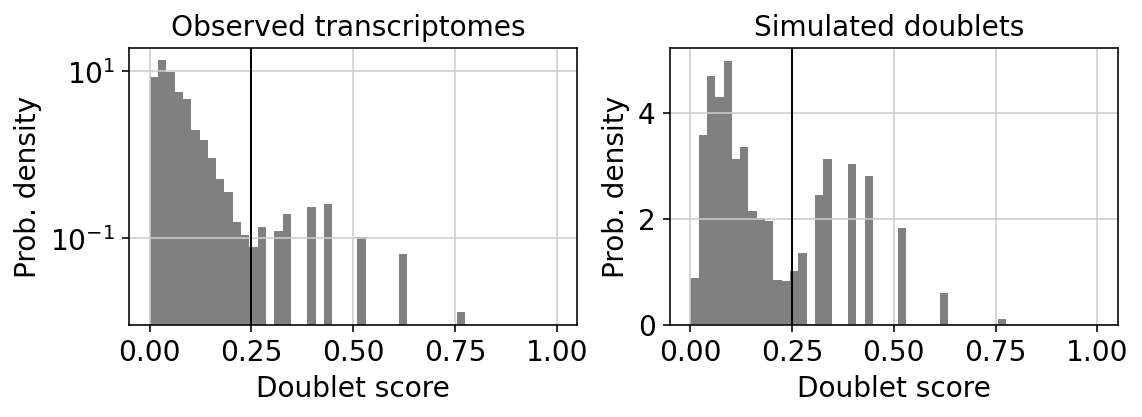

g016


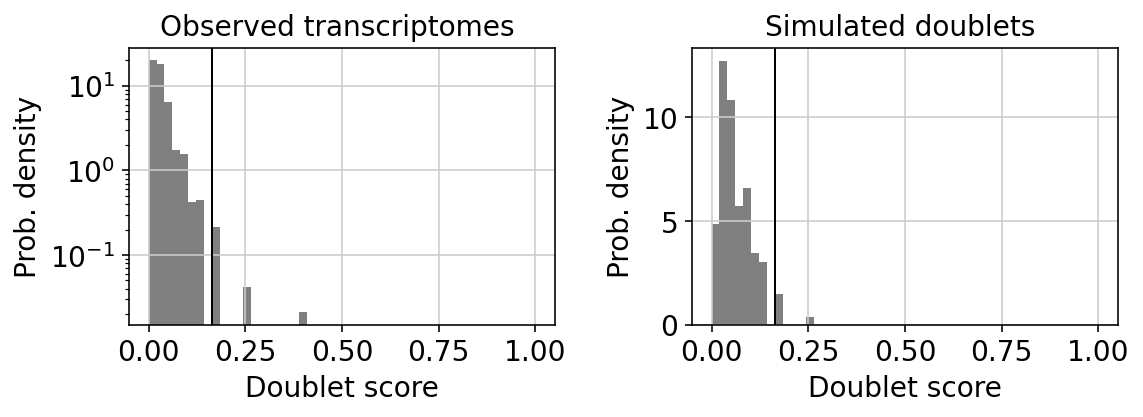

g017


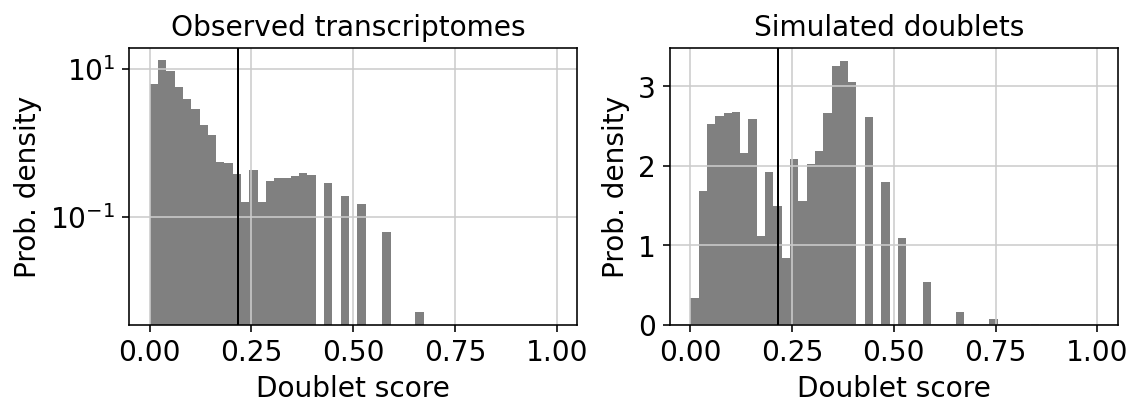

g018


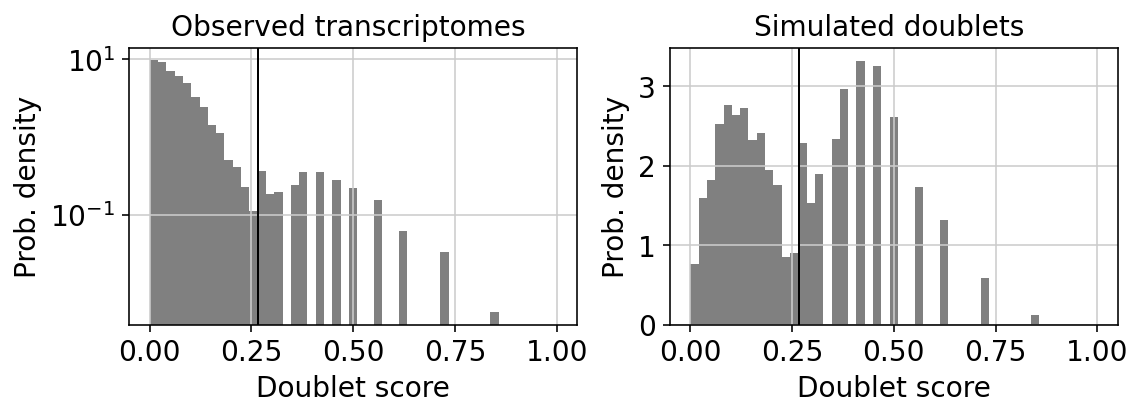

g019


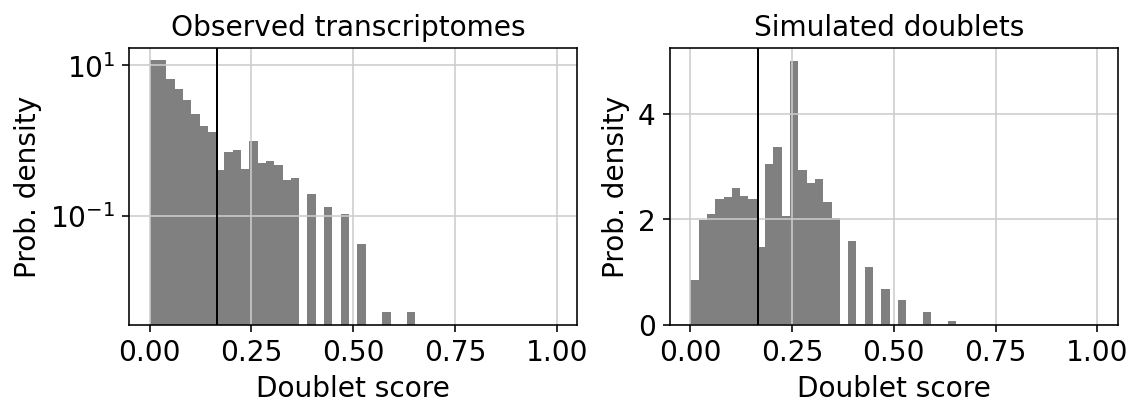

g020


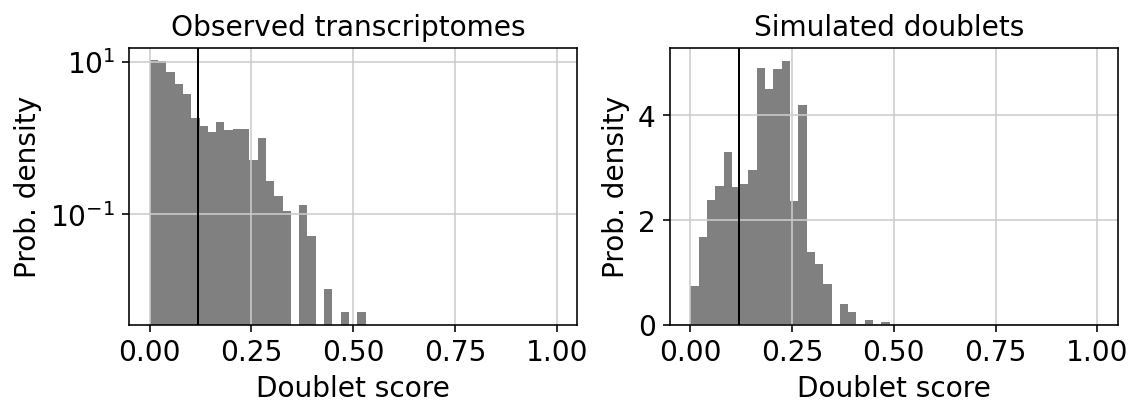

In [15]:
%matplotlib inline
for i in range(numberobj):
    print(names[i])
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),show=True,return_fig=True)

### Add QC and get rid of mitochondrial genes

In [16]:
adata_g004


AnnData object with n_obs × n_vars = 6751 × 60656
    obs: 'species', 'atlas', 'sample', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'scrublet'

<b> check this: sc.pp.calculate_qc_metrics() </b> <br>
expr_type: kind of values in X (str)<br>
var_type: kind of variables (str)<br>
qc_vars: keys for variables you want to control (collection of str)<br>
percent_top: proportions of top genes to cover, for cummulative proportion of counts (collection of int)<br>
layer: alternative layers for expression data (str)<br>
use_raw: use adata.raw.X for expression values (bool)<br>
inplace: place metrics in adata (bool)<br>
log1p: compute log1p transformed annotations, for very small values (bool)<br>
<br>
<b> return features obs </b> <br>
n_genes_by_counts: The number of genes with at least 1 count in a cell. <br>
total_counts: Total number of counts for a cell. <br>
total_counts_mt:Total number of mt gene counts for a cell. <br>
pct_counts_mt: Proportion (%) of total counts for a cell which are mitochondrial. <br> 
n_genes: Number of genes with a positive count. <br>
total_counts_ribo: Total number of ribosomal counts for a cell. <br>
pct_counts_ribo: Proportion of total counts for a cell which are ribosomal.

In [17]:
import numpy as np

for i in range(numberobj):
    #add mt variable annotation indicating if a gene is ribosomal or not (bool)
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('MT-')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('mt-') 
        
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('RP')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('Rp')
    
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=('mt','ribo'), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
     
    locals()[object_names[i]].var_names_make_unique()
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1) #remove all cells with 0 genes
                 
    # The following is to solve a save issue. Probably because of the NA valies in ther 'predicted_doublet' slot
    locals()[object_names[i]].obs['predicted_doublet'] =  locals()[object_names[i]].obs['predicted_doublet'].astype('str')

    

Checking median number of mitochondrial genes, genes and UMIs per cell to have an idea of the quality of each run:

In [18]:
print("Median numbers before filtering mt genes")
for i in range(numberobj):
    print(
         object_names[i],'\n',"\tmito%:",np.median(locals()[object_names[i]].obs['pct_counts_mt']),'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']),'\n', 
            "\tmedian reads/nuclei:",np.median(locals()[object_names[i]].obs['total_counts']),'\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:",  int(np.mean(locals()[object_names[i]].obs['total_counts'])), '\n')
    

Median numbers before filtering mt genes
adata_g004 
 	mito%: 0.06575077029108203 
 	median genes/nuclei: 3640.0 
 	median reads/nuclei: 11064.0 
 	mean genes/nuclei: 3727 
 	mean reads/nuclei: 12432 

adata_g005 
 	mito%: 0.10181818181818182 
 	median genes/nuclei: 3263.0 
 	median reads/nuclei: 8955.0 
 	mean genes/nuclei: 3394 
 	mean reads/nuclei: 10458 

adata_g011 
 	mito%: 0.11507479861910241 
 	median genes/nuclei: 3026.0 
 	median reads/nuclei: 7928.0 
 	mean genes/nuclei: 3157 
 	mean reads/nuclei: 9163 

adata_g012 
 	mito%: 0.05302226935312832 
 	median genes/nuclei: 3461.0 
 	median reads/nuclei: 10379.0 
 	mean genes/nuclei: 3759 
 	mean reads/nuclei: 13735 

adata_g013 
 	mito%: 0.012766500910230492 
 	median genes/nuclei: 2747.0 
 	median reads/nuclei: 6891.0 
 	mean genes/nuclei: 3086 
 	mean reads/nuclei: 9338 

adata_g014 
 	mito%: 0.05714285714285715 
 	median genes/nuclei: 2588.0 
 	median reads/nuclei: 6219.0 
 	mean genes/nuclei: 2818 
 	mean reads/nuclei: 8667 


Filtering out mito genes to determine number of non mitochondrial genes:

In [19]:
for i in range(numberobj):
    #list all non mitochondrial genes for subsetting the columns
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
         non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('MT-')]
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('mt-')]
    
    
    locals()[object_names[i]] = locals()[object_names[i]][:, non_mito_genes_list].copy()
    
    locals()[object_names[i]].obs['total_counts_mito'] =  locals()[object_names[i]].obs['total_counts']
    
    
    #recalculate the number of genes, because some cells only had mt gene counts
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1)

### Recalculate metrics 
Note that the qc_vars=None because we want to keep the mt%."


In [20]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)

Check for the basic statistics

In [21]:
sc.set_figure_params(figsize=[8,8])

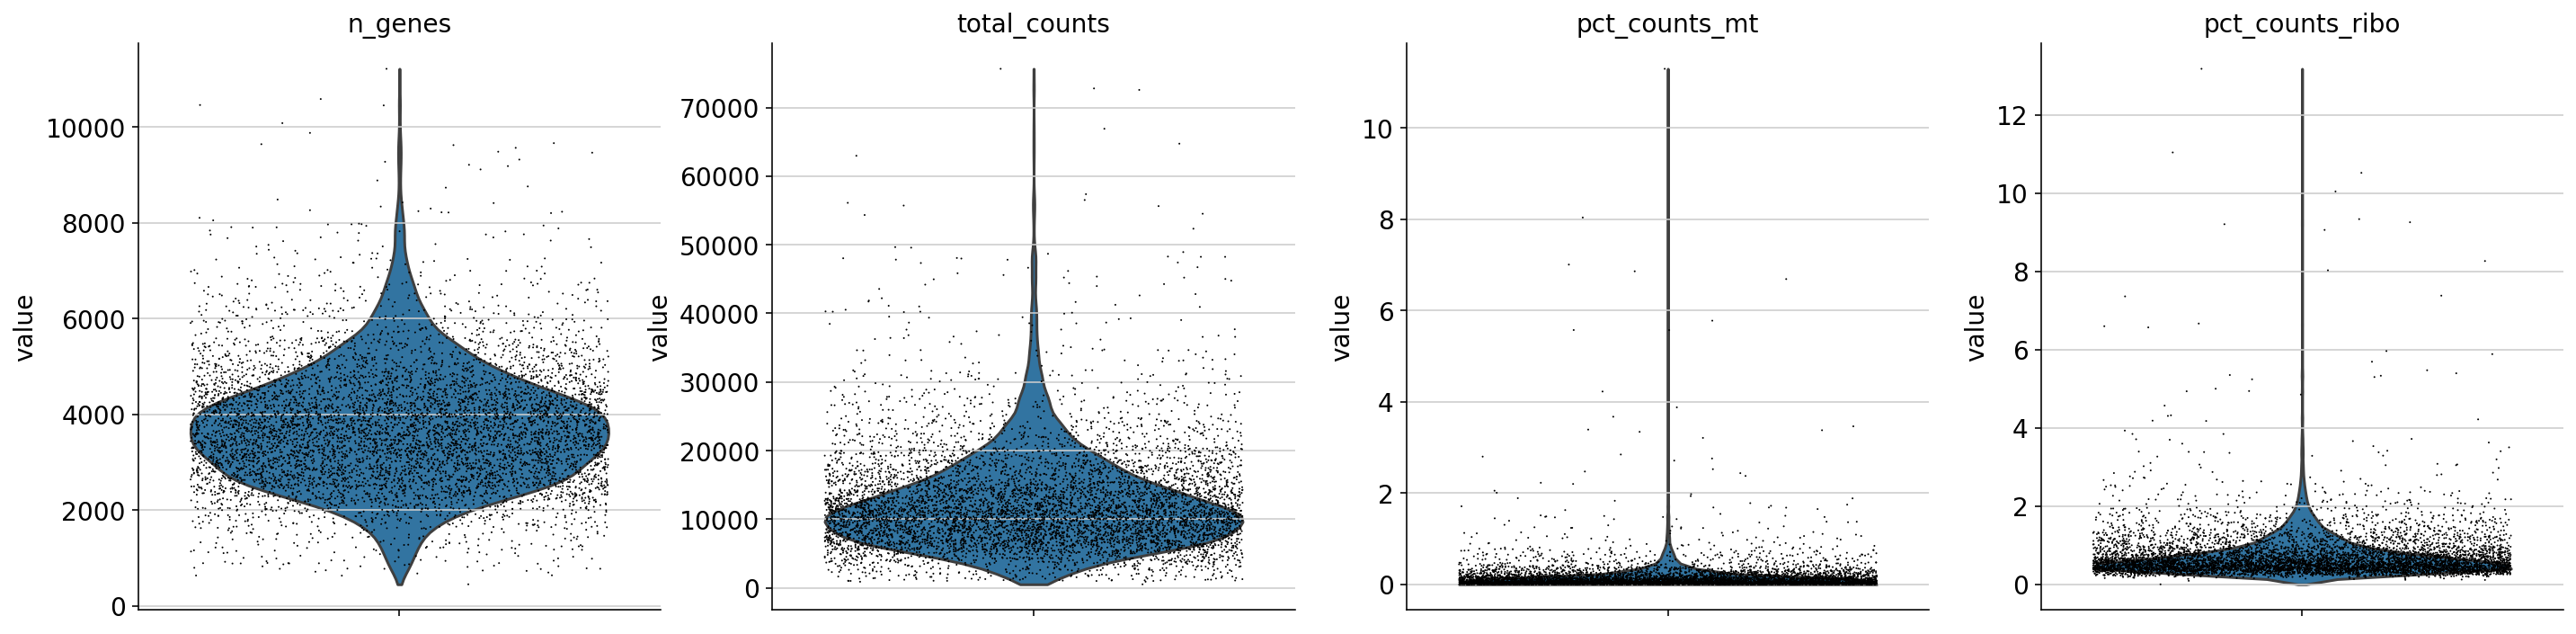

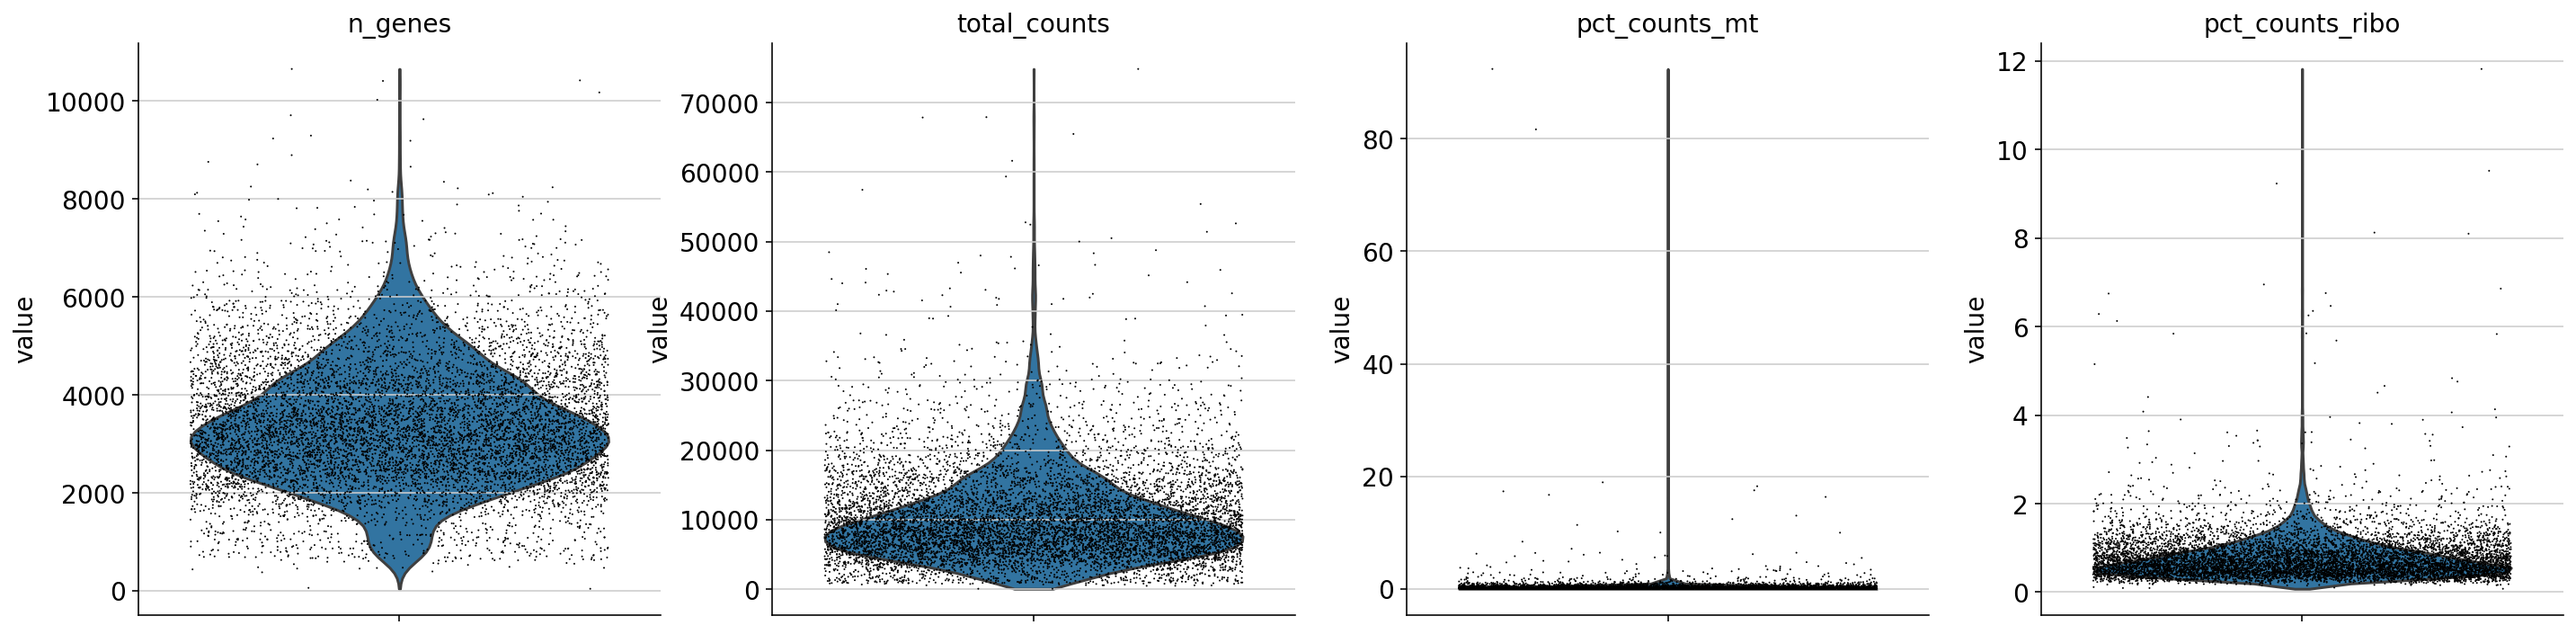

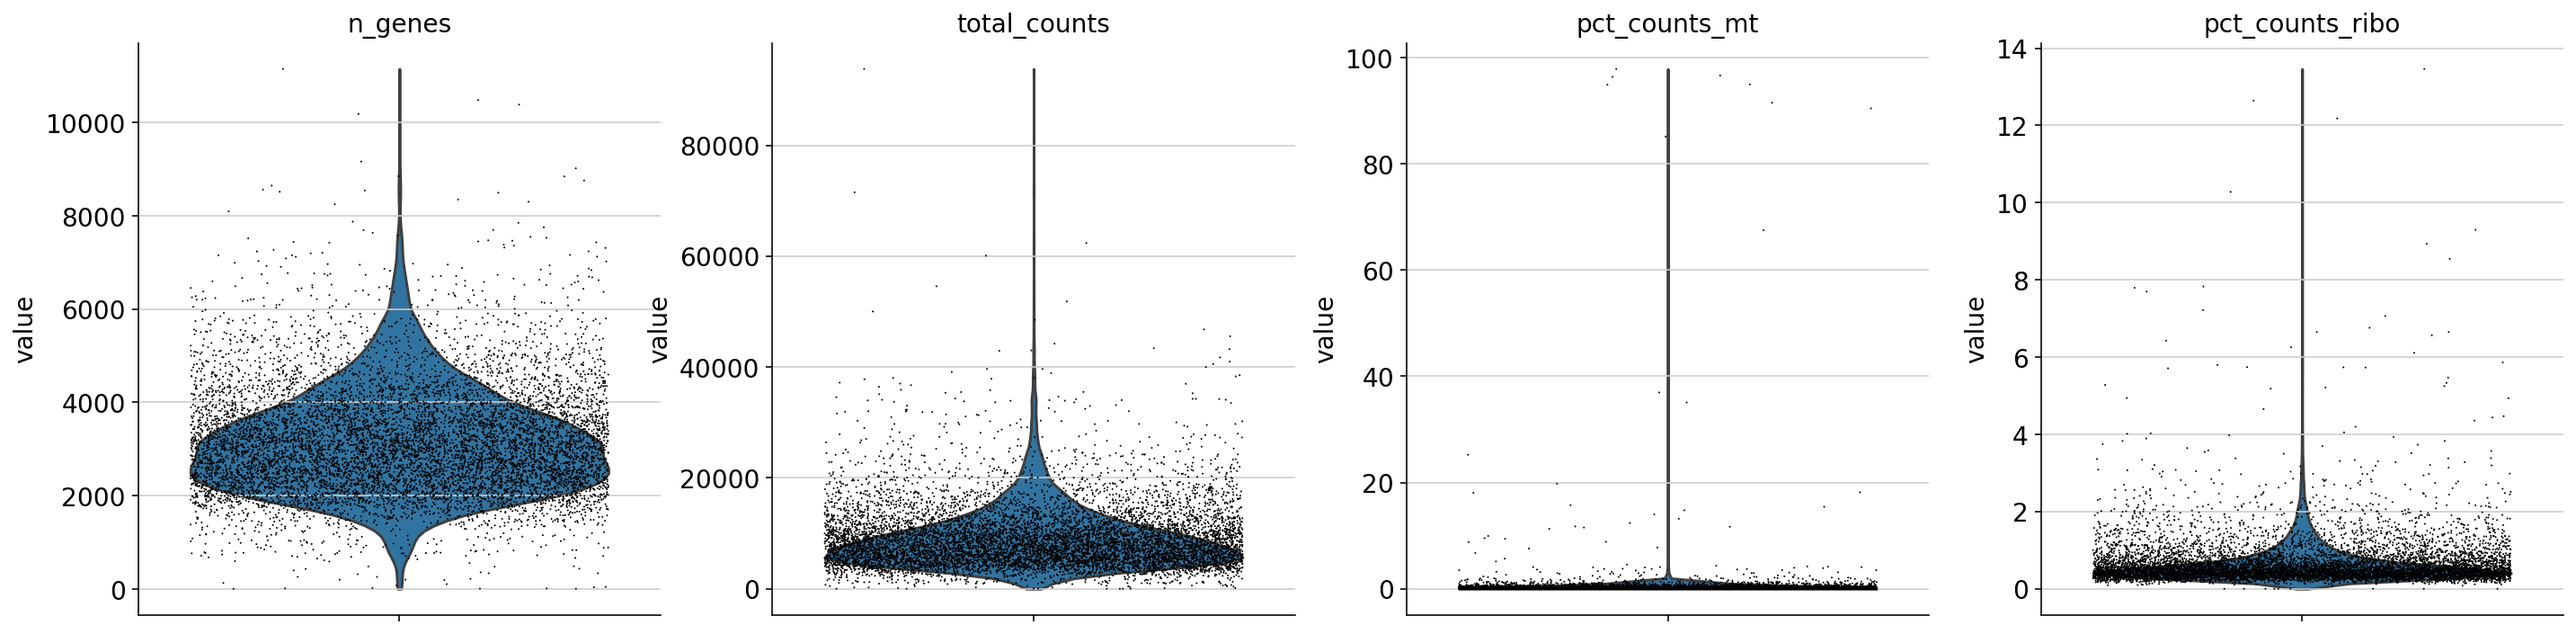

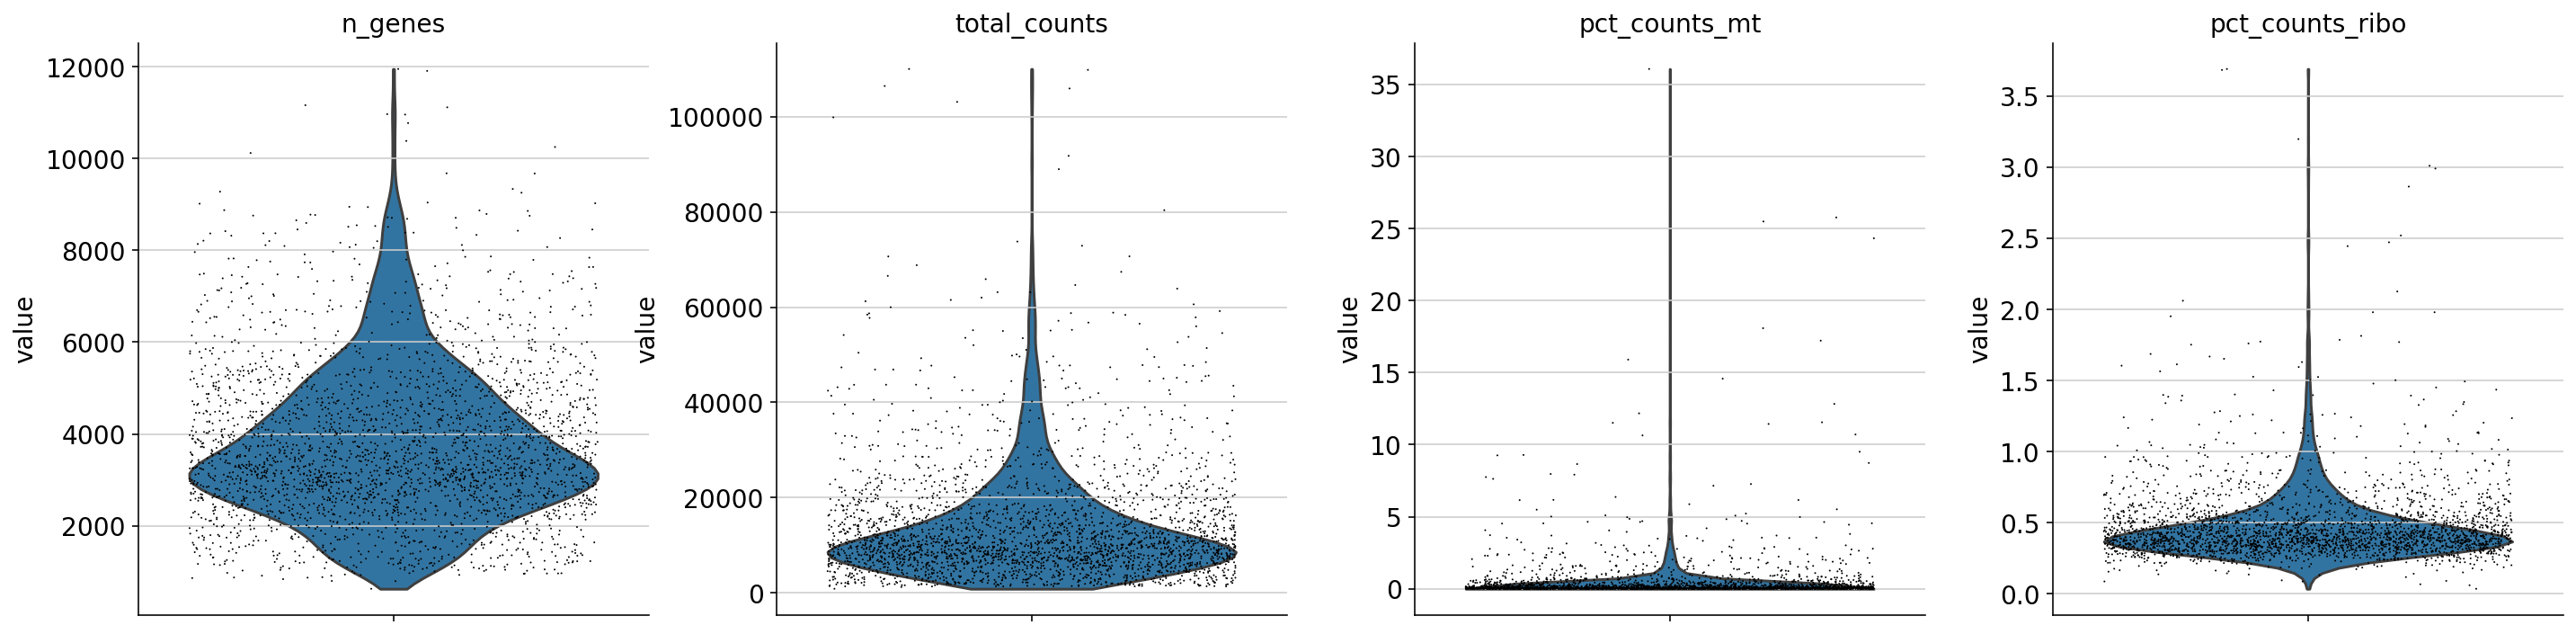

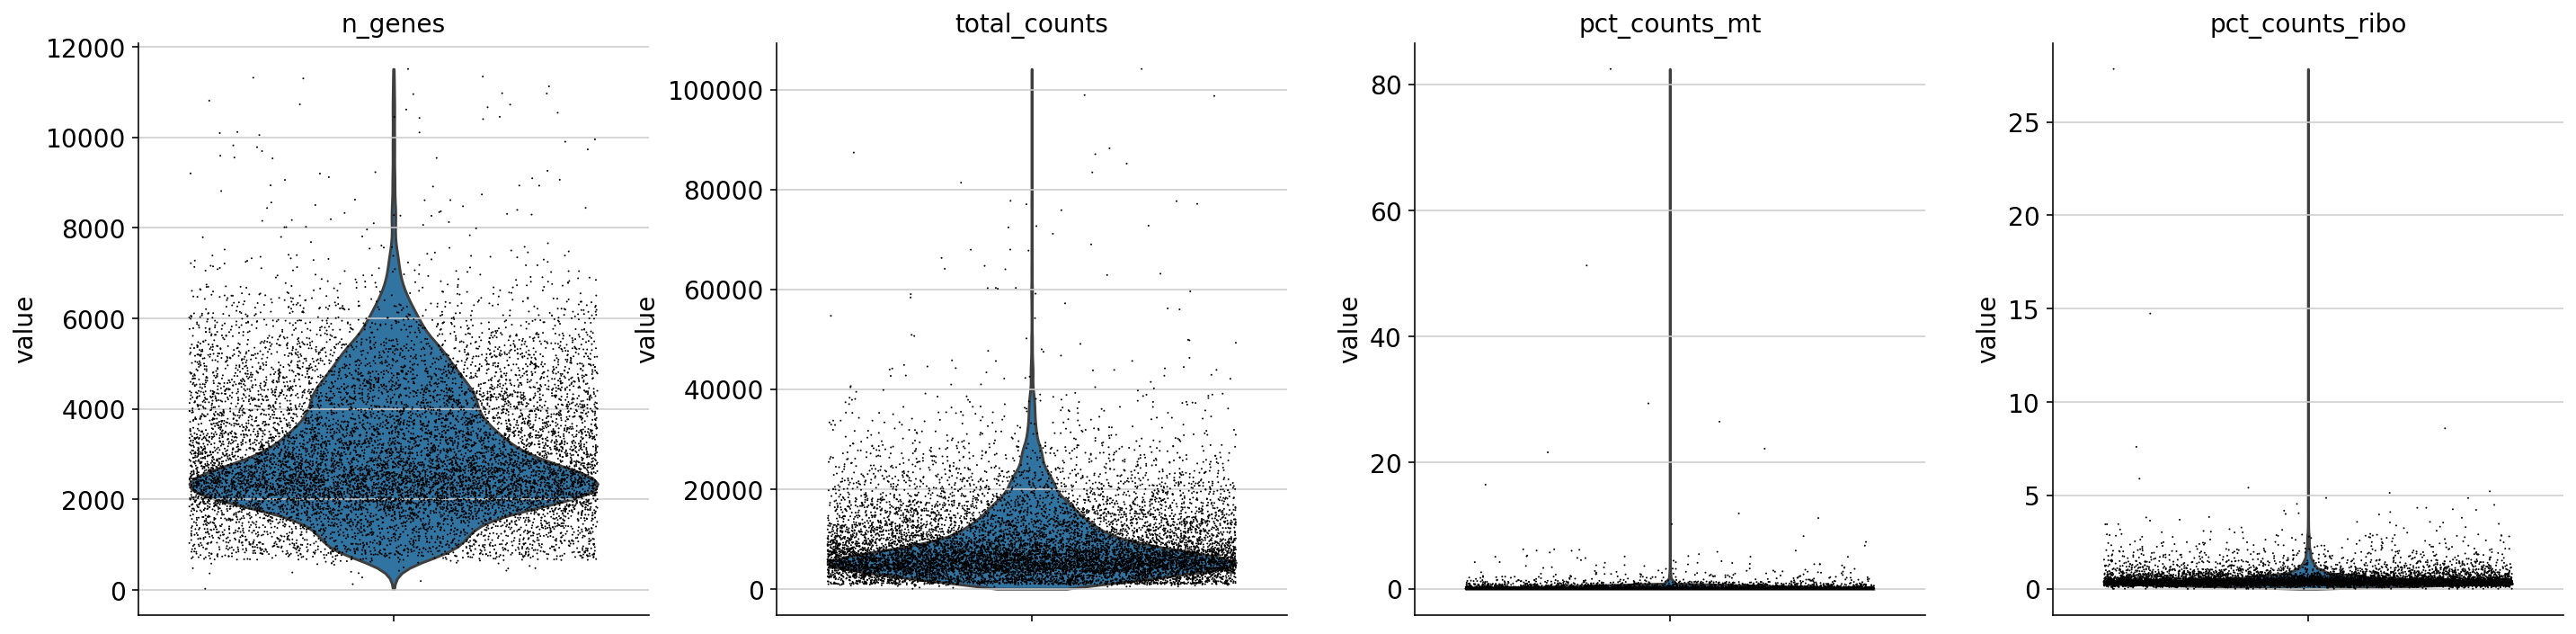

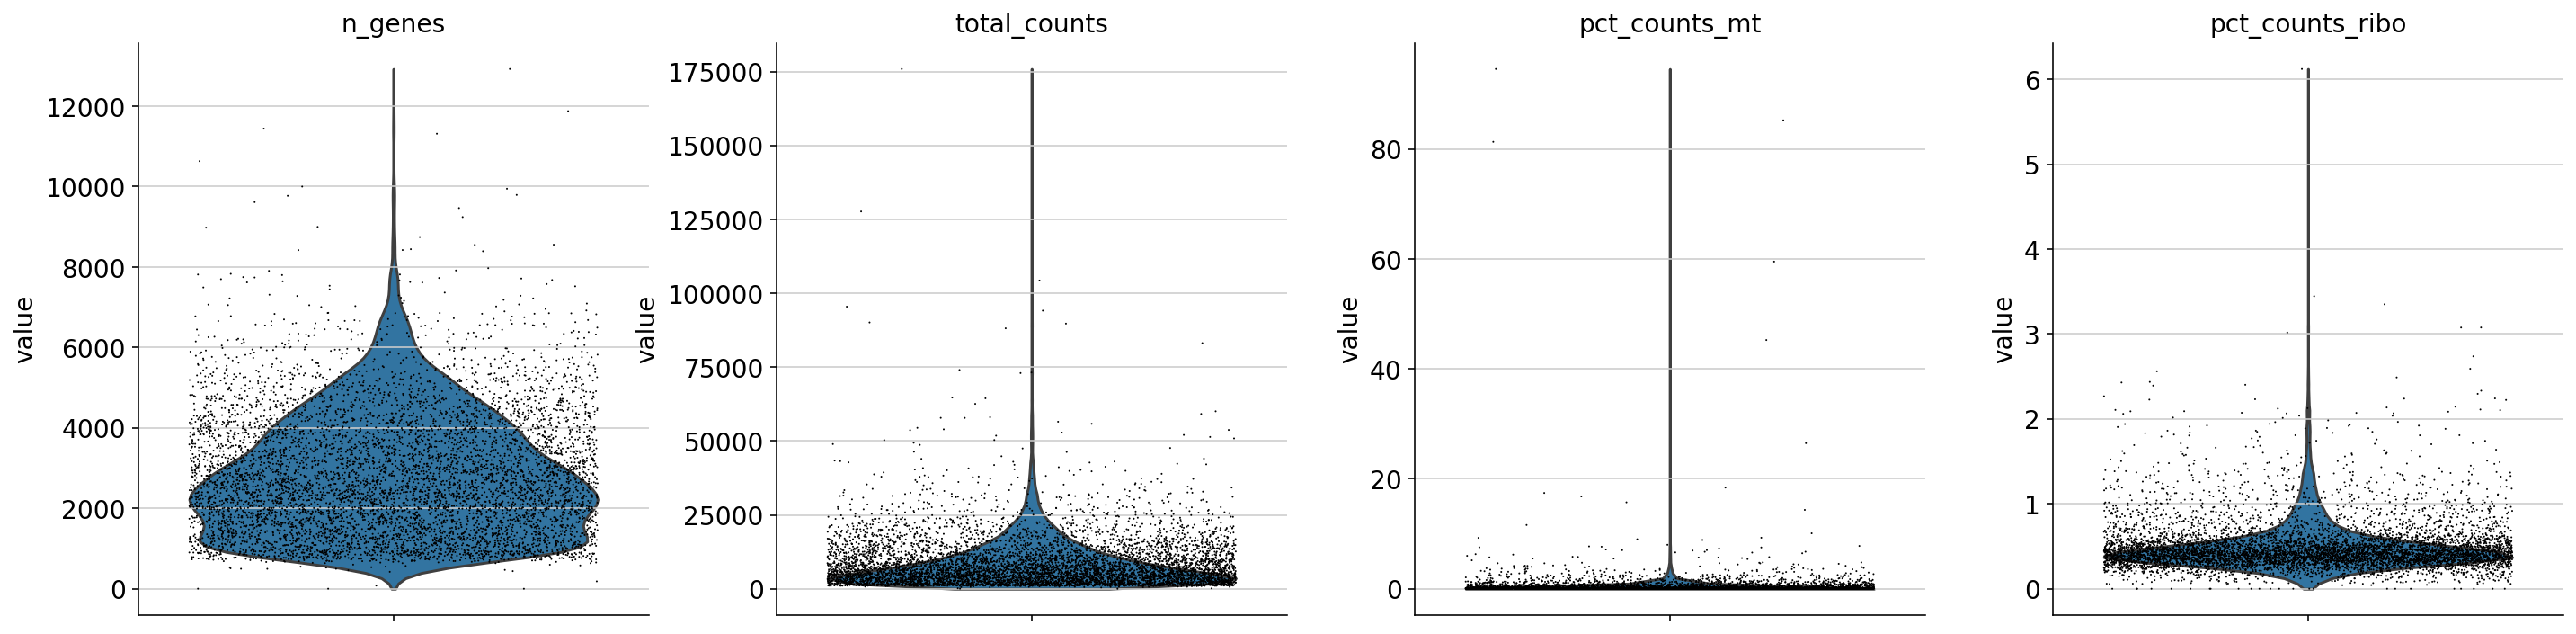

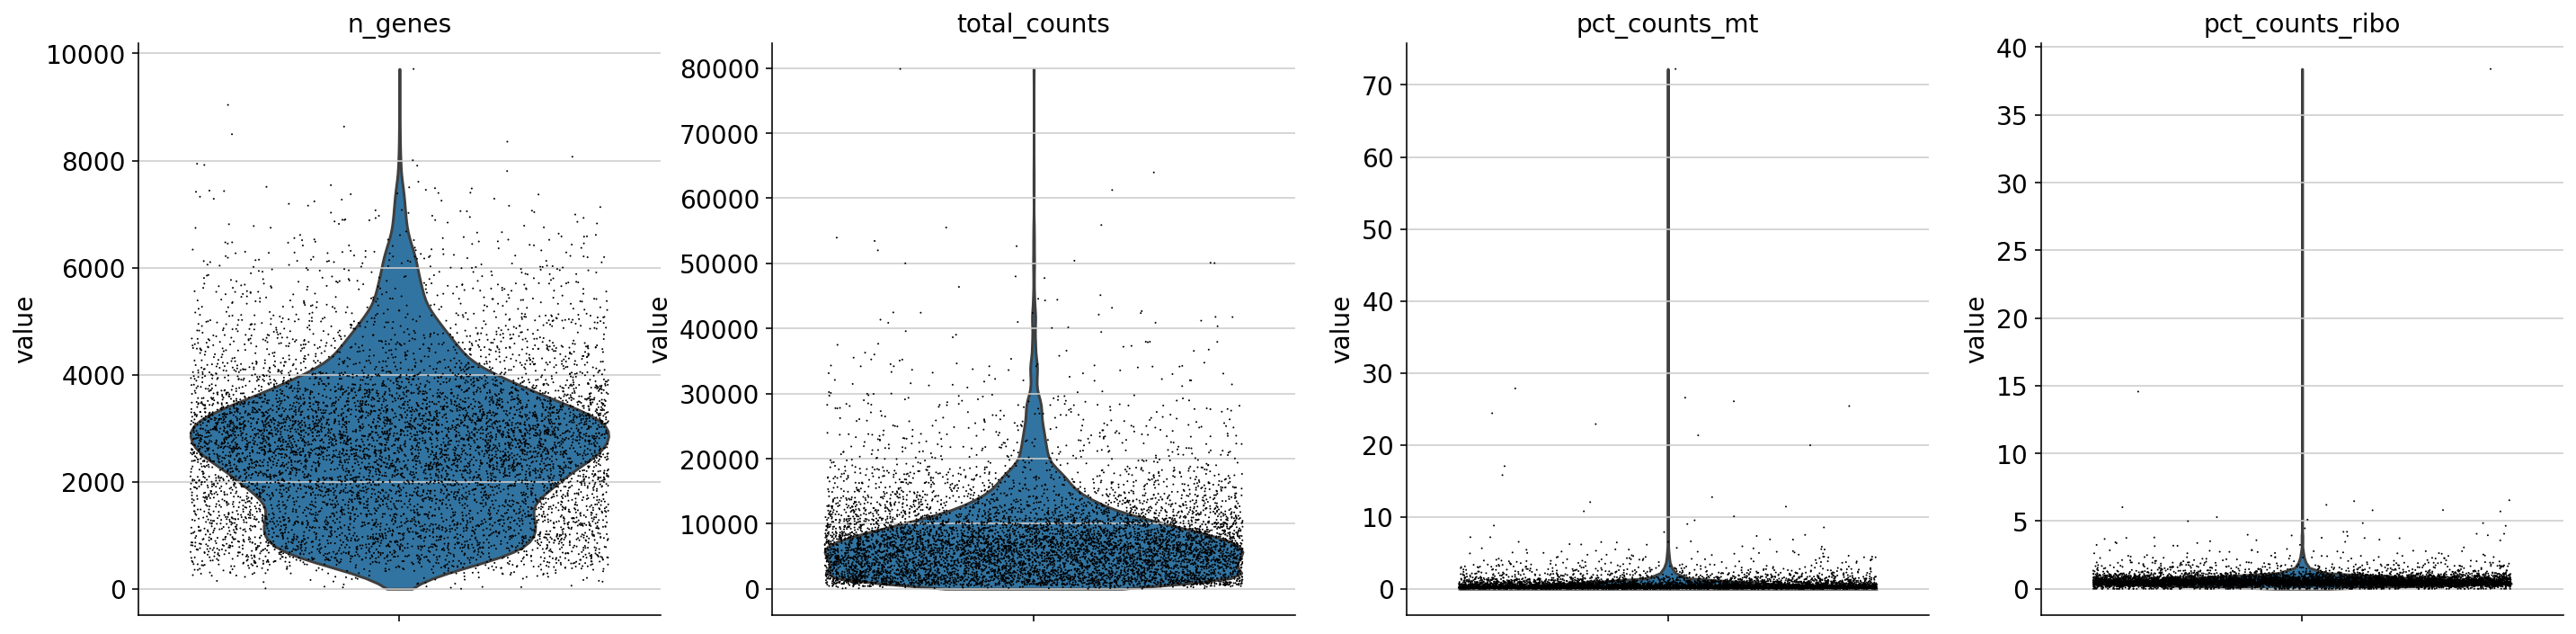

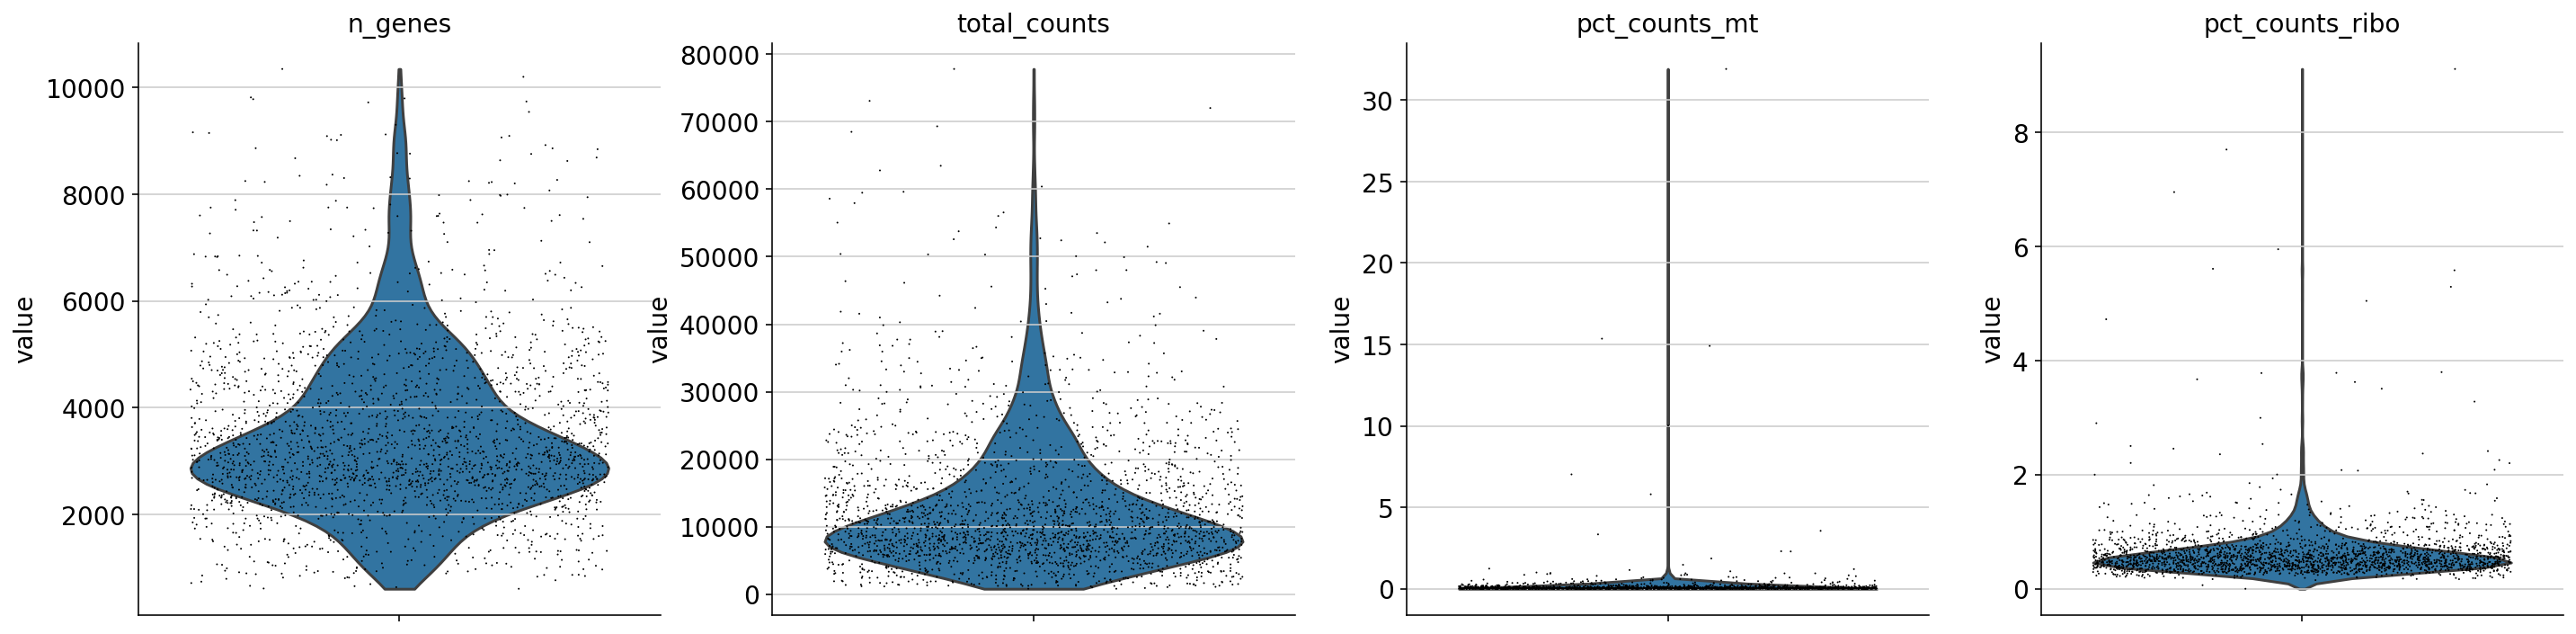

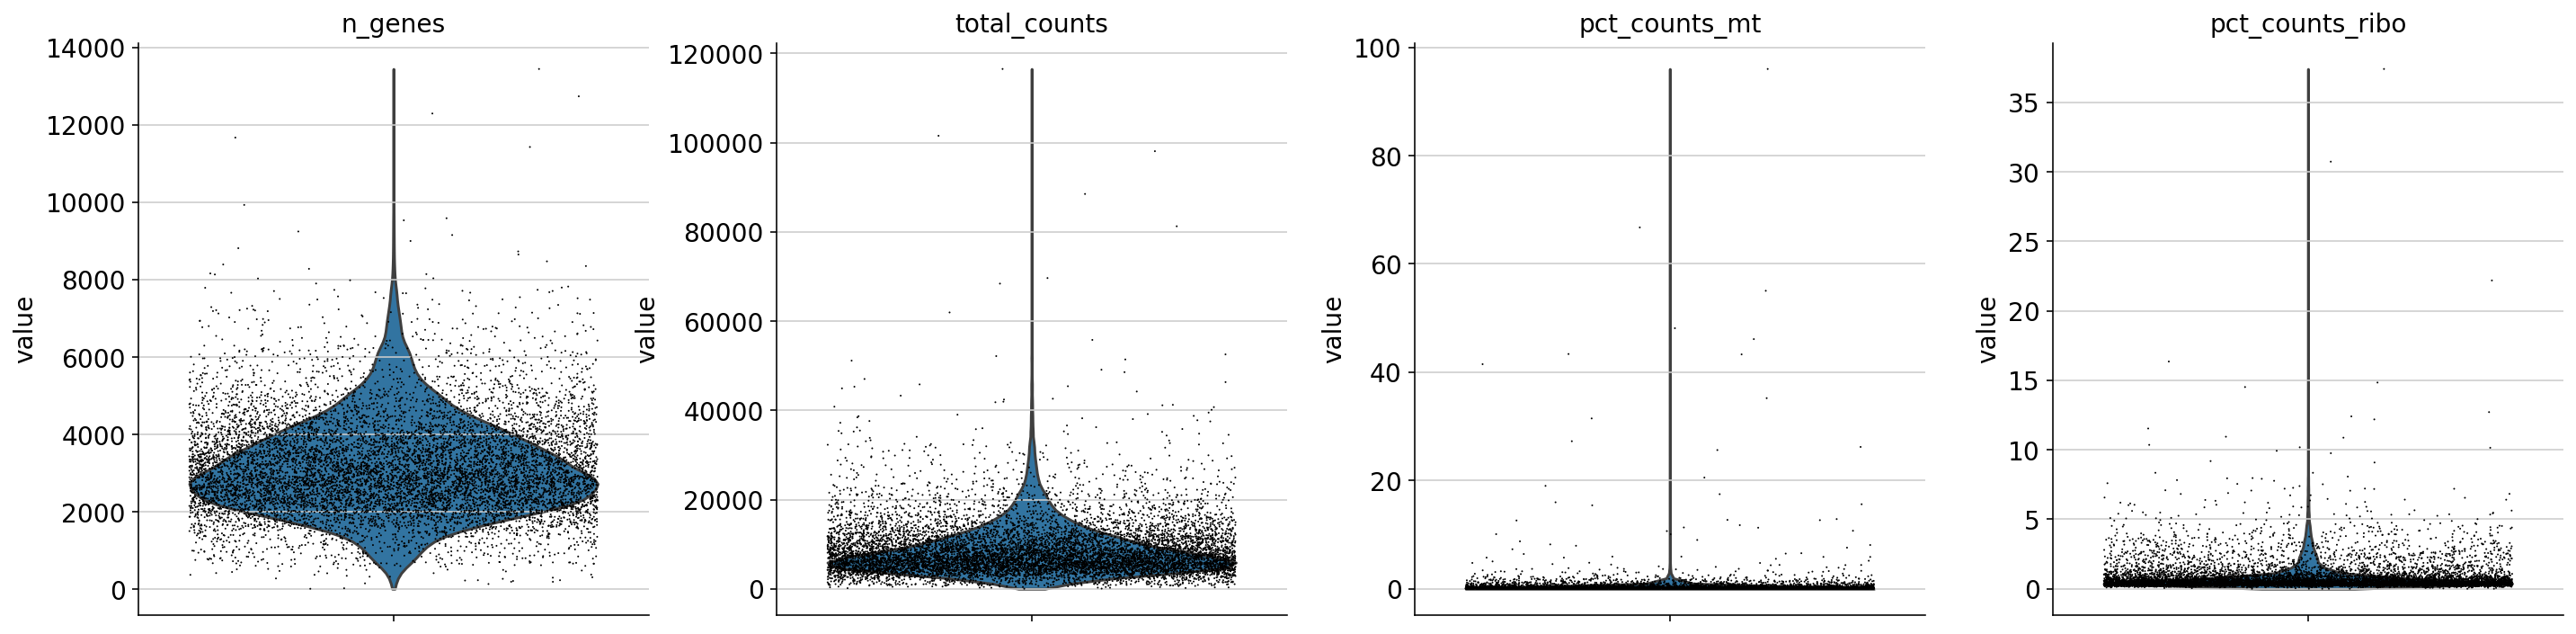

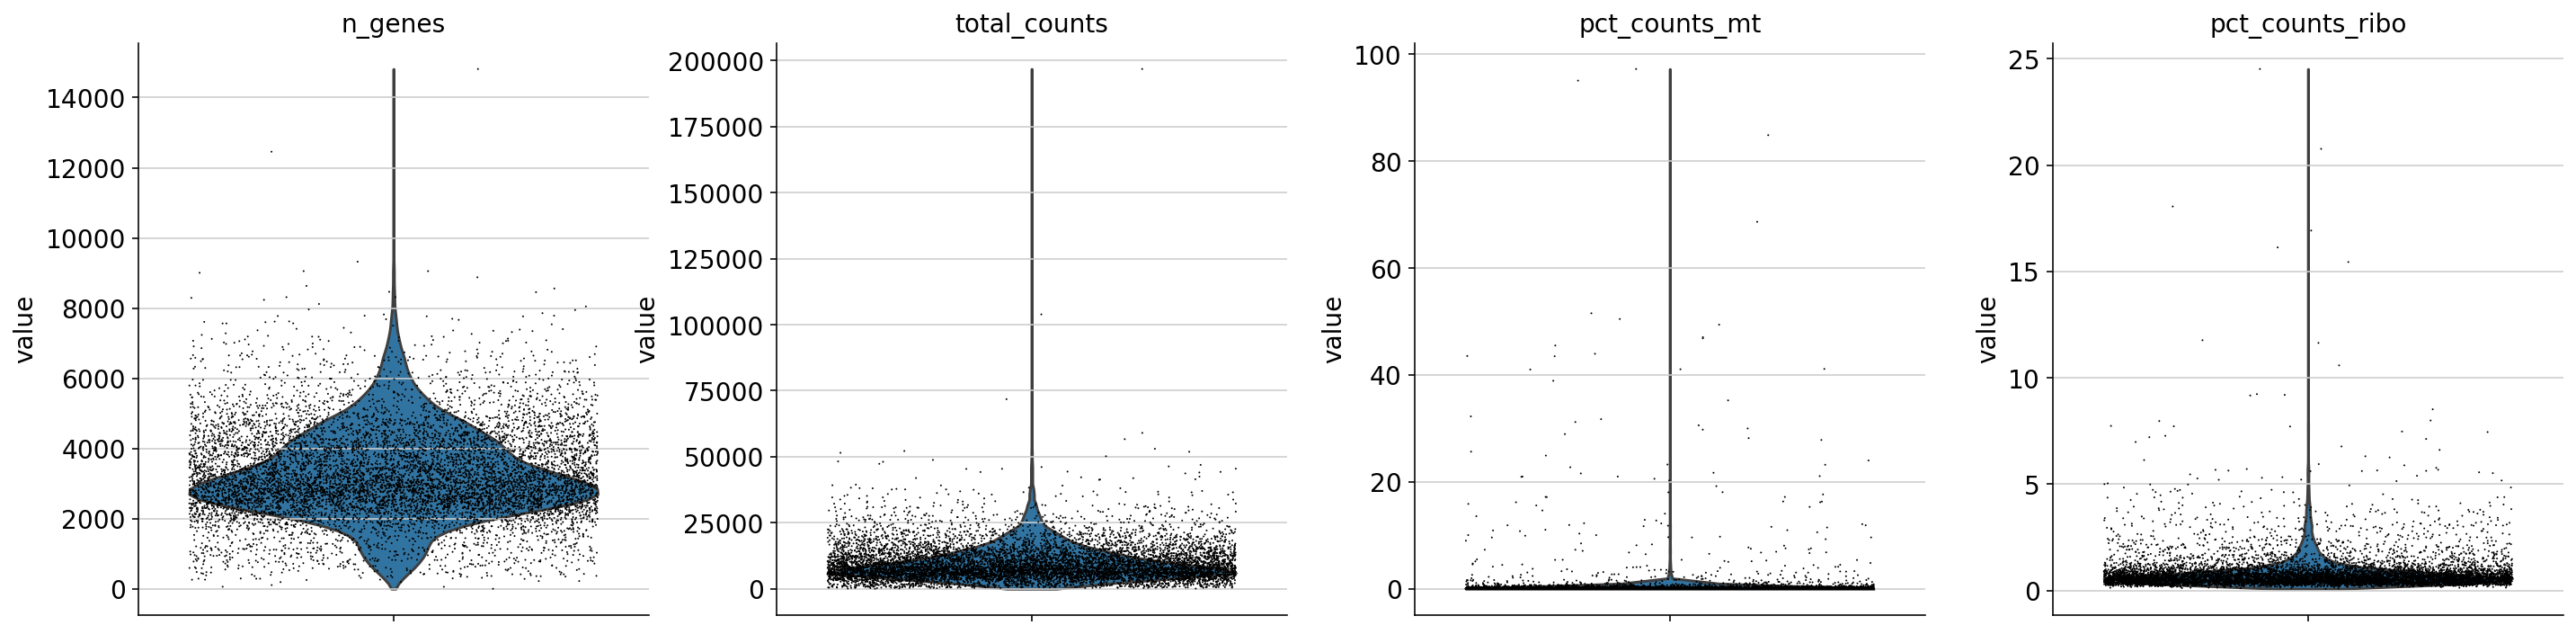

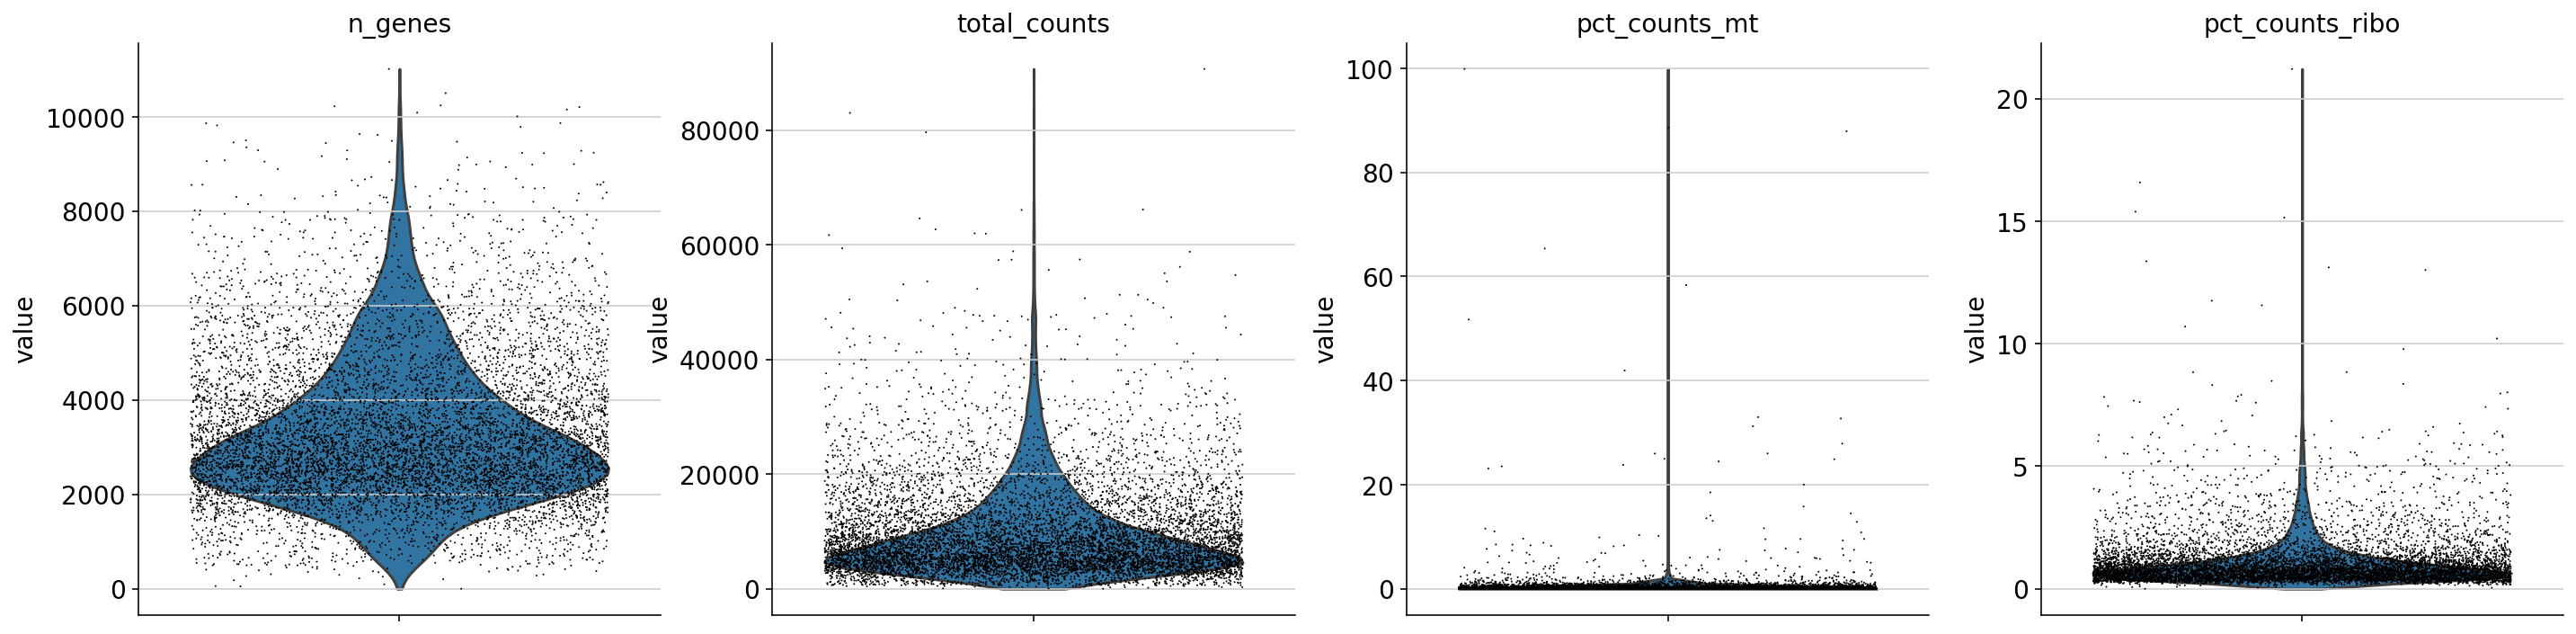

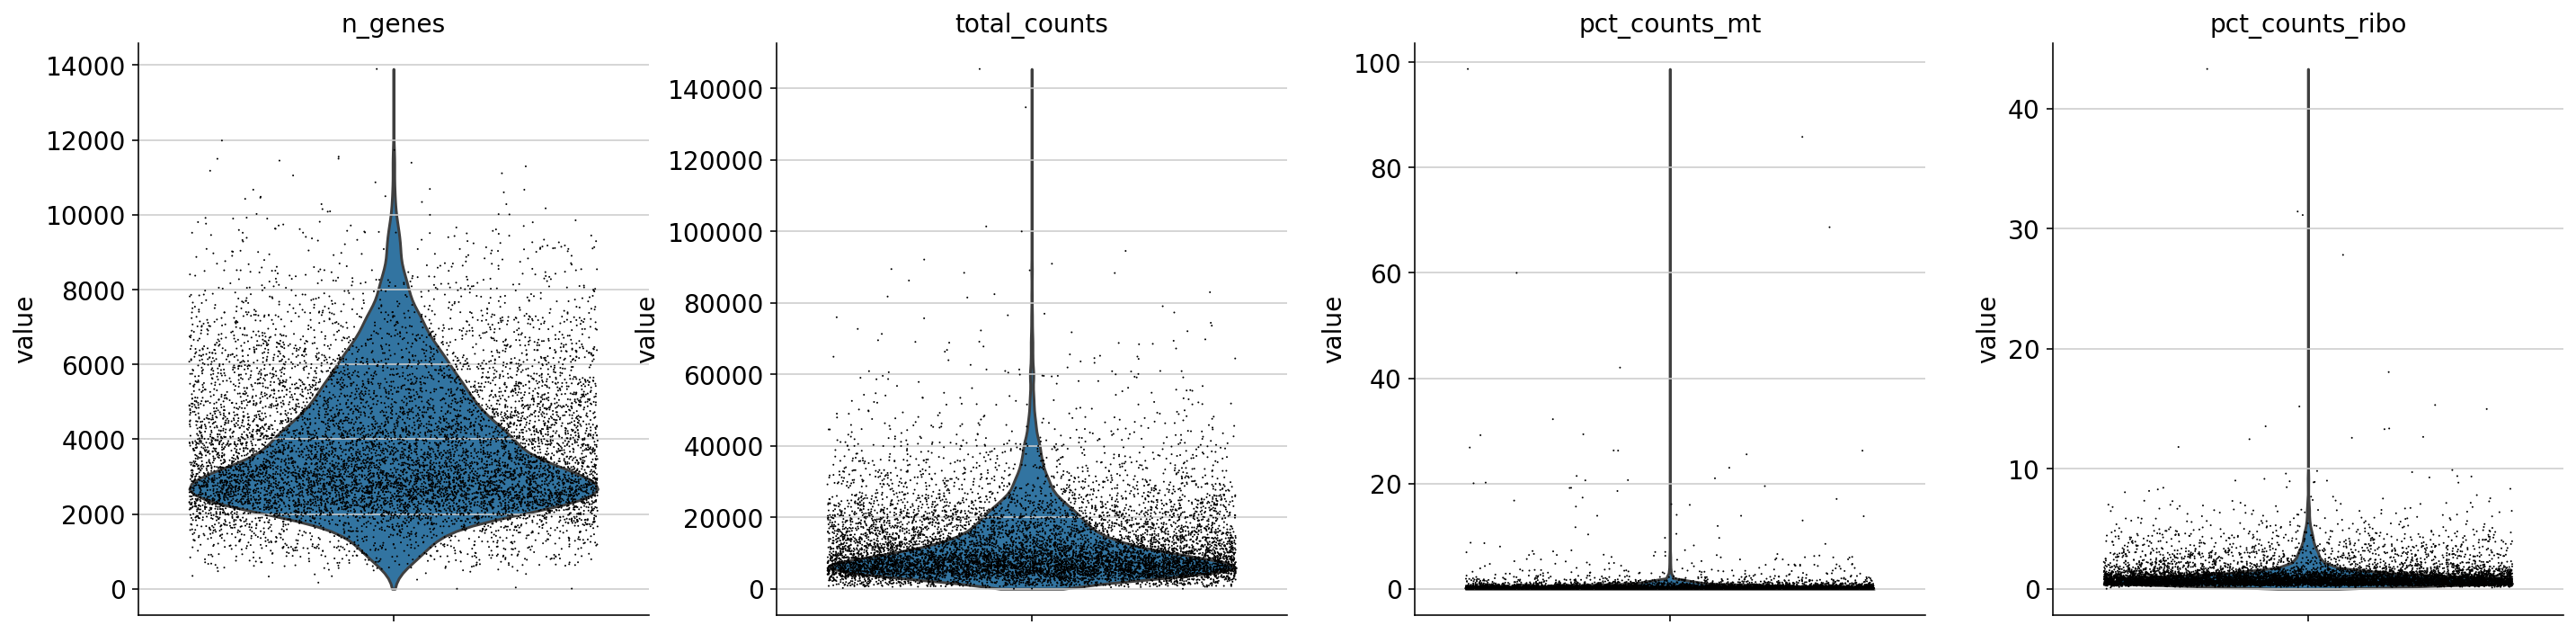

In [22]:
%matplotlib inline
for i in range(numberobj):
    sc.pl.violin(locals()[object_names[i]], ['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, multi_panel=True,size =1)#,save= object_names[i]+"_prefilter_all.pdf")
    plt.show()

In [23]:
print("Median numbers without mitochondrial reads\n")


for i in range(numberobj):
    median_counts = np.median(locals()[object_names[i]].obs['total_counts_mito'])
    mean_counts= int(np.mean(locals()[object_names[i]].obs['total_counts_mito']))

    median_counts_mito = np.median(locals()[object_names[i]].obs['total_counts']) 
    mean_counts_mito =int(np.mean(locals()[object_names[i]].obs['total_counts']))

    median_difference = median_counts - median_counts_mito 
    mean_difference = mean_counts -  mean_counts_mito
    
    pct_median_diff = median_difference / median_counts
    pct_mean_diff = mean_difference/mean_counts
    
    print(object_names[i],'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']), '\n',
            "\tmedian reads/nuclei:",median_counts, '(',median_difference,'\t', pct_median_diff,'%',')','\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:", mean_counts, '(',mean_difference,'\t', pct_mean_diff,'%',')','\n')

Median numbers without mitochondrial reads

adata_g004 
 	median genes/nuclei: 3636.0 
 	median reads/nuclei: 11064.0 ( 14.5 	 0.0013105567606652205 % ) 
 	mean genes/nuclei: 3722 
 	mean reads/nuclei: 12432 ( 14 	 0.0011261261261261261 % ) 

adata_g005 
 	median genes/nuclei: 3257.0 
 	median reads/nuclei: 8955.0 ( 21.0 	 0.0023450586264656616 % ) 
 	mean genes/nuclei: 3388 
 	mean reads/nuclei: 10458 ( 17 	 0.0016255498183209026 % ) 

adata_g011 
 	median genes/nuclei: 3020.0 
 	median reads/nuclei: 7928.0 ( 11.0 	 0.0013874873864783048 % ) 
 	mean genes/nuclei: 3151 
 	mean reads/nuclei: 9163 ( 16 	 0.0017461530066572083 % ) 

adata_g012 
 	median genes/nuclei: 3459.0 
 	median reads/nuclei: 10379.0 ( 7.0 	 0.0006744387705944696 % ) 
 	mean genes/nuclei: 3754 
 	mean reads/nuclei: 13735 ( 30 	 0.002184200946487077 % ) 

adata_g013 
 	median genes/nuclei: 2745.5 
 	median reads/nuclei: 6891.0 ( 5.5 	 0.0007981425047162966 % ) 
 	mean genes/nuclei: 3083 
 	mean reads/nuclei: 9338 ( 7 

### Save preprocessed files

In [24]:
for i in range(numberobj):
    locals()[object_names[i]].write(os.path.join('data/preprocessed_altena_'+object_names[i][6:]+'.h5ad'))

In [25]:
!ls data/

preprocessed_altena_g004.h5ad  preprocessed_altena_g018.h5ad
preprocessed_altena_g005.h5ad  preprocessed_altena_g019.h5ad
preprocessed_altena_g011.h5ad  preprocessed_altena_g020.h5ad
preprocessed_altena_g012.h5ad  preprocessed_smajic_SRR12621867.h5ad
preprocessed_altena_g013.h5ad  preprocessed_smajic_SRR12621868.h5ad
preprocessed_altena_g014.h5ad  preprocessed_smajic_SRR12621869.h5ad
preprocessed_altena_g015.h5ad  preprocessed_smajic_SRR12621870.h5ad
preprocessed_altena_g016.h5ad  preprocessed_smajic_SRR12621871.h5ad
preprocessed_altena_g017.h5ad  preprocessed_smajic_SRR12621872.h5ad
